In [ ]:
import cv2
import glob 
import numpy 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.model_selection import learning_curve

Treaer los directorios de la imagenes

In [2]:
paths = glob.glob('training_set/**/*')
print(len(paths))

8007


In [3]:
def load_images(paths, image_size):
    list_images = []
    list_labels = []
    for path in paths: 
        try:
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            #Pasar las imagenes al mismo tamaño 
            img = cv2.resize(img, image_size)
            #Flatten y dividir entre 255 
            vector = img.flatten()/255.0
            list_images.append(vector)
            #1 perro 
            if 'dogs' in path:
                list_labels.append(1)
            else: 
                #Gatos
                list_labels.append(0)
        except: 
            pass 
    return list_images, list_labels
        


In [ ]:
image_size = (64,64)
list_images, list_labels = load_images(paths=paths, image_size=image_size)


In [5]:
X = list_images
y = list_labels

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/joseandrescarvajalbautista/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print('accuracy_score:', accuracy_train)

accuracy_score: 0.7551530293566521


In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('accuracy score', accuracy)

accuracy score 0.5165521549031855


In [10]:
model = LogisticRegression(penalty='l2', C = 0.05)
model.fit(X_train, y_train)

/Users/joseandrescarvajalbautista/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.05)

In [11]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print('accuracy_score:', accuracy_train)

accuracy_score: 0.7371955028107433


In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('accuracy score', accuracy)

accuracy score 0.5402873204247346


In [13]:
paths = glob.glob('test_set/**/*')
list_images, list_labels = load_images(paths = paths, image_size=image_size)

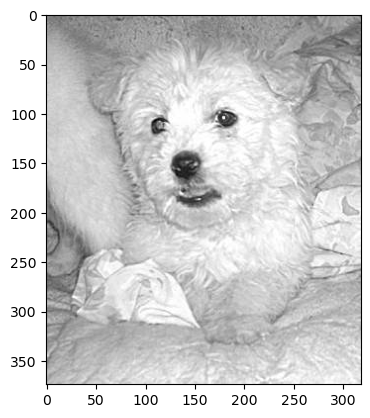

Perro


In [14]:
#Realizar pipeline
img_100 = list_images[204]

#Predecir con el modelo 
y_pred = model.predict(img_100.reshape(1,-1))
#Mostrar imagenes
img = cv2.imread(paths[204], cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

if y_pred[0] == 0:
    print('Gato')
else: 
    print('Perro')

Guardar modelos en local

In [15]:
import joblib

joblib.dump(model, 'modelo_regresion_logistica.joblib')


['modelo_regresion_logistica.joblib']

In [16]:
modelo_perro = joblib.load('modelo_regresion_logistica.joblib')

In [17]:
modelo_perro.predict(img_100.reshape(1,-1))

array([1])